# Decision Tree Classification 


## Import libraries/dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score


In [2]:
loans_dataset = pd.read_csv('Loans_Dataset.csv')

In [3]:
loans_dataset

,initial_payment,last_payment,credit_score,house_number,sum,result
0,201,10018,250,3046,13515,yes
1,205,10016,395,3044,13660,yes
2,257,10129,109,3251,13746,yes
3,246,10064,324,3137,13771,yes
4,117,10115,496,3094,13822,yes
...,...,...,...,...,...,...
999,168,14798,834,4937,20737,No
1000,234,14567,756,4766,20678,yes
1001,450,13897,867,7896,210456,yes
1002,347,14999,687,9876,246789,yes


drop house number

## Data Exploration

In [9]:
loans_dataset.describe()

,initial_payment,last_payment,credit_score,house_number,sum
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000
mean,294.662351,12473.009960,528.902390,4041.282869,17744.012948
std,115.844218,1442.134231,259.681745,618.431417,9594.659715
min,100.000000,10005.000000,100.000000,3003.000000,13515.000000
25%,195.750000,11213.500000,302.750000,3546.500000,16081.250000
50%,290.000000,12467.000000,518.000000,4046.000000,17383.000000
75%,398.000000,13690.000000,755.000000,4508.750000,18608.250000
max,500.000000,14999.000000,997.000000,9876.000000,246789.000000


In [11]:
loans_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   initial_payment  1004 non-null   int64 
 1   last_payment     1004 non-null   int64 
 2   credit_score     1004 non-null   int64 
 3   house_number     1004 non-null   int64 
 4   sum              1004 non-null   int64 
 5   result           1004 non-null   object
dtypes: int64(5), object(1)
memory usage: 47.2+ KB


To Do - Change result into 1 or 0/ and type

In [14]:
loans_dataset.isnull().sum()

initial_payment    0
last_payment       0
credit_score       0
house_number       0
sum                0
result             0
dtype: int64

No null values

## Data Preprocessing

In [18]:
le = LabelEncoder()
loans_dataset['result']= le.fit_transform(loans_dataset['result'])

In [20]:
loans_dataset

,initial_payment,last_payment,credit_score,house_number,sum,result
0,201,10018,250,3046,13515,1
1,205,10016,395,3044,13660,1
2,257,10129,109,3251,13746,1
3,246,10064,324,3137,13771,1
4,117,10115,496,3094,13822,1
...,...,...,...,...,...,...
999,168,14798,834,4937,20737,0
1000,234,14567,756,4766,20678,1
1001,450,13897,867,7896,210456,1
1002,347,14999,687,9876,246789,1


<Axes: >

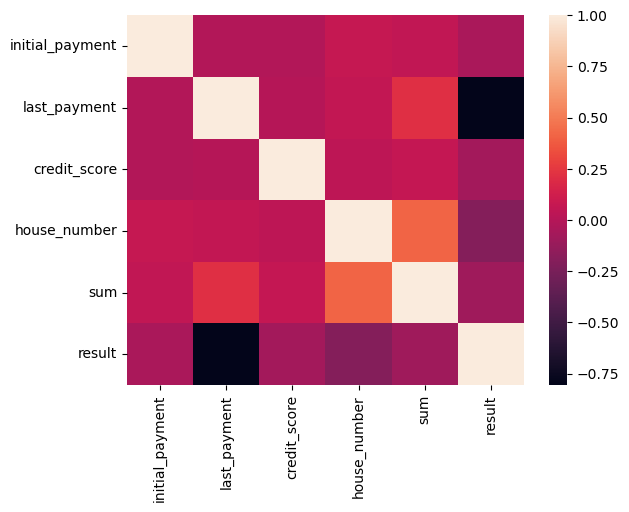

In [22]:

sns.heatmap(loans_dataset.corr())

In [24]:
loans_dataset.drop(columns=['house_number'], inplace=True)

## Modeling

In [29]:
X = loans_dataset.drop('result', axis=1)
y = loans_dataset['result']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = True)

In [33]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [55]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [57]:
y_pred = classifier.predict(X_test)

y_pred_array = np.array(y_pred).reshape(len(y_pred), 1)
y_test_array = np.array(y_test).reshape(len(y_test), 1)

print(np.concatenate((y_pred_array, y_test_array), 1))

[[0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]

## Evaluation


In [61]:
accuracy_score(y_test, y_pred)

1.0

In [45]:
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00        95

    accuracy                           1.00       201
   macro avg       1.00      1.00      1.00       201
weighted avg       1.00      1.00      1.00       201



In [47]:
print(f"F1 Score : {f1_score(y_test, y_pred)}")

F1 Score : 1.0


<Axes: >

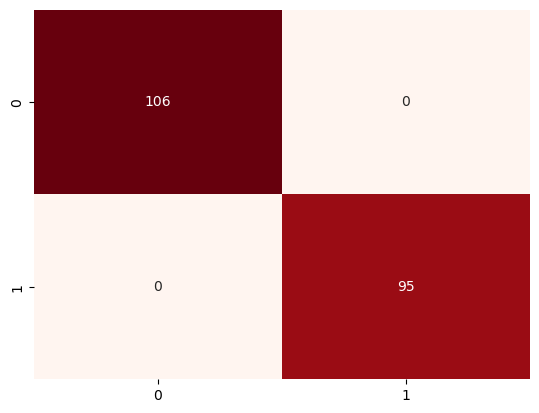

In [49]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Reds', cbar=False)

signs of overfitting